In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rohit-sharma-international-centuries/Rohit_Sharma_Centuries.csv
/kaggle/input/rohit-sharma-international-centuries/Rohit_Sharma_Centuries.xlsx


In [2]:
rohit = pd.read_csv('/kaggle/input/rohit-sharma-international-centuries/Rohit_Sharma_Centuries.csv')
rohit.head()

,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
0,1,28-05-2010,114,95.79,ODI,4,1,Yes,No,No,Zimbabwe,"Queens Sports Club, Bulawayo",Away,Lost
1,2,30-05-2010,101,170.00,ODI,4,2,No,Yes,No,Sri Lanka,"Queens Sports Club, Bulawayo",Neutral,Won
2,3,16-10-2013,141,114.63,ODI,1,2,No,Yes,No,Australia,"Sawai Mansingh Stadium, Jaipur",Home,Won
3,4,02-11-2013,209,132.27,ODI,1,1,Yes,Yes,No,Australia,"M. Chinnaswamy Stadium, Bangalore",Home,Won
4,5,13-11-2014,264,152.60,ODI,2,1,Yes,Yes,No,Sri Lanka,"Eden Gardens, Kolkata",Home,Won


In [3]:
rohit.describe()

,S.No.,Score,Strike Rate,Position,Innings
count,48.00,48.000000,48.000000,48.000000,48.000000
mean,24.50,134.937500,109.656042,1.708333,1.541667
std,14.00,34.744298,41.704401,1.320192,0.581939
min,1.00,100.000000,50.560000,1.000000,1.000000
25%,12.75,111.000000,85.197500,1.000000,1.000000
50%,24.50,124.500000,105.710000,1.000000,1.500000
75%,36.25,147.750000,121.100000,2.000000,2.000000
max,48.00,264.000000,274.410000,6.000000,3.000000


In [4]:
rohit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.No.             48 non-null     int64  
 1   Date              48 non-null     object 
 2   Score             48 non-null     int64  
 3   Strike Rate       48 non-null     float64
 4   Type of Match     48 non-null     object 
 5   Position          48 non-null     int64  
 6   Innings           48 non-null     int64  
 7   Dismissed         48 non-null     object 
 8   Man of the Match  48 non-null     object 
 9   Captain           48 non-null     object 
 10  Against           48 non-null     object 
 11  Venue             48 non-null     object 
 12  H/A/N             48 non-null     object 
 13  Result            48 non-null     object 
dtypes: float64(1), int64(4), object(9)
memory usage: 5.4+ KB


In [5]:
rohit = rohit.astype({'Date' : 'datetime64[ns]'})
rohit.head()

,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
0,1,2010-05-28,114,95.79,ODI,4,1,Yes,No,No,Zimbabwe,"Queens Sports Club, Bulawayo",Away,Lost
1,2,2010-05-30,101,170.00,ODI,4,2,No,Yes,No,Sri Lanka,"Queens Sports Club, Bulawayo",Neutral,Won
2,3,2013-10-16,141,114.63,ODI,1,2,No,Yes,No,Australia,"Sawai Mansingh Stadium, Jaipur",Home,Won
3,4,2013-02-11,209,132.27,ODI,1,1,Yes,Yes,No,Australia,"M. Chinnaswamy Stadium, Bangalore",Home,Won
4,5,2014-11-13,264,152.60,ODI,2,1,Yes,Yes,No,Sri Lanka,"Eden Gardens, Kolkata",Home,Won


In [6]:
Rohit_centuries_in_different_formats = rohit['Type of Match'].value_counts()
Rohit_centuries_in_different_formats

Type of Match
ODI     31
Test    12
T20      5
Name: count, dtype: int64

In [7]:
Rohit_centuries_on_being_captain = rohit['Captain'].value_counts()
Rohit_centuries_on_being_captain

Captain
No     37
Yes    11
Name: count, dtype: int64

In [8]:
Rohit_ODI_Centuries_on_being_captain = rohit.loc[(rohit['Type of Match'] == 'ODI') & (rohit['Captain'] == 'Yes')]
Rohit_ODI_Centuries_on_being_captain

,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
15,16,2017-12-13,208,135.94,ODI,1,1,No,Yes,Yes,Sri Lanka,"Punjab Cricket Association Stadium, Mohali",Home,Won
18,19,2018-09-23,111,93.27,ODI,1,2,No,No,Yes,Pakistan,"Dubai Cricket Stadium, Dubai",Neutral,Won
29,30,2023-01-24,101,118.82,ODI,1,1,Yes,No,Yes,New Zealand,"Holkar Cricket Stadium, Indore",Home,Won
30,31,2023-11-10,131,155.95,ODI,1,2,Yes,Yes,Yes,Afghanistan,"Arun Jaitley Stadium, Delhi",Home,Won


In [9]:
Rohit_ODI_home_centuries = rohit.loc[(rohit['Type of Match'] == 'ODI') & (rohit['H/A/N'] == 'Home')]
print(Rohit_ODI_home_centuries.count().iloc[0])
Rohit_ODI_home_centuries

13


,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
2,3,2013-10-16,141,114.63,ODI,1,2,No,Yes,No,Australia,"Sawai Mansingh Stadium, Jaipur",Home,Won
3,4,2013-02-11,209,132.27,ODI,1,1,Yes,Yes,No,Australia,"M. Chinnaswamy Stadium, Bangalore",Home,Won
4,5,2014-11-13,264,152.60,ODI,2,1,Yes,Yes,No,Sri Lanka,"Eden Gardens, Kolkata",Home,Won
7,8,2015-11-10,150,112.78,ODI,1,2,Yes,No,No,South Africa,"Green Park Stadium, Kanpur",Home,Lost
13,14,2017-01-10,125,114.67,ODI,2,2,Yes,Yes,No,Australia,"Vidarbha Cricket Association Stadium, Nagpur",Home,Won
14,15,2017-10-29,147,106.52,ODI,1,1,Yes,Yes,No,New Zealand,"Green Park Stadium, Kanpur",Home,Won
15,16,2017-12-13,208,135.94,ODI,1,1,No,Yes,Yes,Sri Lanka,"Punjab Cricket Association Stadium, Mohali",Home,Won
19,20,2018-10-21,152,129.58,ODI,1,2,No,No,No,West Indies,"ACA Stadium, Guwahati",Home,Won
20,21,2018-10-29,162,118.25,ODI,1,1,Yes,Yes,No,West Indies,"Brabourne Stadium, Mumbai",Home,Won
27,28,2019-12-18,159,115.21,ODI,1,1,Yes,Yes,No,West Indies,"ACA-VDCA Stadium, Vishakhapatnam",Home,Won


In [10]:
Rohit_ODI_Away_centuries = rohit.loc[(rohit['Type of Match'] == 'ODI') & (rohit['H/A/N'] == 'Away')]
print(Rohit_ODI_Away_centuries.count().iloc[0])
Rohit_ODI_Away_centuries

10


,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
0,1,2010-05-28,114,95.79,ODI,4,1,Yes,No,No,Zimbabwe,"Queens Sports Club, Bulawayo",Away,Lost
5,6,2015-01-18,138,99.28,ODI,1,1,Yes,No,No,Australia,"Melbourne Cricket Ground, Melbourne",Away,Lost
8,9,2016-12-01,171,104.90,ODI,1,1,No,No,No,Australia,"WACA Ground, Perth",Away,Lost
9,10,2016-01-15,124,97.63,ODI,1,1,Yes,Yes,No,Australia,"The Gabba, Brisbane",Away,Lost
11,12,2017-08-27,124,85.51,ODI,1,2,No,No,No,Sri Lanka,"Pallekele International Cricket Stadium, Palle...",Away,Won
12,13,2017-08-31,104,118.18,ODI,1,1,Yes,No,No,Sri Lanka,"R. Premadasa Stadium, Colombo",Away,Won
16,17,2018-02-13,115,91.26,ODI,1,1,Yes,Yes,No,South Africa,"St. George's Park, Port Elizabeth",Away,Won
17,18,2018-12-07,137,120.17,ODI,1,2,No,No,No,England,"Trent Bridge, Nottingham",Away,Won
21,22,2019-12-01,133,103.10,ODI,1,2,Yes,No,No,Australia,"Sydney Cricket Ground, Sydney",Away,Lost
24,25,2019-06-30,102,93.57,ODI,2,2,Yes,No,No,England,"Edgbaston Cricket Ground, Birmingham",Away,Lost


In [11]:
Rohit_Test_home_centuries = rohit.loc[(rohit['Type of Match'] == 'Test') & (rohit['H/A/N'] == 'Home')]
print(Rohit_Test_home_centuries.count().iloc[0])
Rohit_Test_home_centuries

10


,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
31,32,2013-06-11,177,58.80,Test,6,2,Yes,Yes,No,West Indies,"Eden Gardens, Kolkata",Home,Won
32,33,2013-11-14,111,60.15,Test,6,2,No,No,No,West Indies,"Wankhede Stadium, Mumbai",Home,Won
33,34,2017-11-24,102,63.75,Test,6,2,No,No,No,Sri Lanka,"Vidarbha Cricket Association Stadium, Nagpur",Home,Won
34,35,2019-02-10,176,72.45,Test,2,1,Yes,Yes,No,South Africa,"VDCA Cricket Stadium, Vishakhapatnam",Home,Won
35,36,2019-02-10,127,85.23,Test,2,3,Yes,Yes,No,South Africa,"VDCA Cricket Stadium, Vishakhapatnam",Home,Won
36,37,2019-10-19,212,83.13,Test,2,1,Yes,Yes,No,South Africa,"JSCA International Stadium Complex, Ranchi",Home,Won
37,38,2021-02-13,161,69.69,Test,1,1,Yes,No,No,England,"M. A. Chidambaram Stadium, Chennai",Home,Won
39,40,2023-09-02,120,60.85,Test,1,2,Yes,No,Yes,Australia,"Vidarbha Cricket Association Stadium, Nagpur",Home,Won
41,42,2024-02-15,131,57.05,Test,2,1,Yes,No,Yes,England,"Niranjan Shah Stadium, Rajkot",Home,Won
42,43,2024-07-03,103,64.37,Test,2,2,Yes,No,Yes,England,"HPCA Stadium, Dharamshala",Home,Won


In [12]:
Rohit_Test_Away_centuries = rohit.loc[(rohit['Type of Match'] == 'Test') & (rohit['H/A/N'] == 'Away')]
print(Rohit_Test_Away_centuries.count().iloc[0])
Rohit_Test_Away_centuries

2


,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
38,39,2021-02-09,127,50.56,Test,1,3,Yes,Yes,No,England,"The Oval, London",Away,Won
40,41,2023-12-07,103,58.05,Test,2,2,Yes,No,Yes,West Indies,"Windsor Park, Roseau",Away,Won


In [13]:
Rohit_T20_home_centuries = rohit.loc[(rohit['Type of Match'] == 'T20') & (rohit['H/A/N'] == 'Home')]
print(Rohit_T20_home_centuries.count().iloc[0])
Rohit_T20_home_centuries

4


,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
43,44,2015-02-10,106,160.60,T20,1,1,Yes,No,No,South Africa,"HPCA Stadium, Dharamshala",Home,Lost
44,45,2017-12-22,118,274.41,T20,1,1,Yes,Yes,Yes,Sri Lanka,"Holkar Cricket Stadium, Indore",Home,Won
46,47,2018-06-11,111,181.96,T20,1,1,No,Yes,Yes,West Indies,"Ekana Stadium, Lucknow",Home,Won
47,48,2024-01-17,121,175.36,T20,2,1,No,Yes,Yes,Afghanistan,"M. Chinnaswamy Stadium, Bangalore",Home,Won


In [14]:
Rohit_T20_Away_centuries = rohit.loc[(rohit['Type of Match'] == 'T20') & (rohit['H/A/N'] == 'Away')]
print(Rohit_T20_Away_centuries.count().iloc[0])
Rohit_T20_Away_centuries

1


,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
45,46,2018-08-07,100,178.57,T20,1,2,No,Yes,No,England,"Bristol County Ground, Bristol",Away,Won


In [15]:
Rohit_centuries_in_neutral_location = rohit.loc[rohit['H/A/N'] == 'Neutral']
print(Rohit_centuries_in_neutral_location.count().iloc[0])
Rohit_centuries_in_neutral_location

8


,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
1,2,2010-05-30,101,170.00,ODI,4,2,No,Yes,No,Sri Lanka,"Queens Sports Club, Bulawayo",Neutral,Won
6,7,2015-03-19,137,108.73,ODI,1,1,Yes,Yes,No,Bangladesh,"Melbourne Cricket Ground, Melbourne",Neutral,Won
10,11,2017-06-15,123,95.34,ODI,1,2,No,Yes,No,Bangladesh,"Edgbaston Cricket Ground, Birmingham",Neutral,Won
18,19,2018-09-23,111,93.27,ODI,1,2,No,No,Yes,Pakistan,"Dubai Cricket Stadium, Dubai",Neutral,Won
22,23,2019-05-06,122,85.10,ODI,1,2,No,Yes,No,South Africa,"Rose Bowl, Southampton",Neutral,Won
23,24,2019-06-16,140,123.89,ODI,2,1,Yes,Yes,No,Pakistan,"Old Trafford Cricket Ground, Manchester",Neutral,Won
25,26,2019-02-07,104,113.04,ODI,2,1,Yes,Yes,No,Bangladesh,"Edgbaston Cricket Ground, Birmingham",Neutral,Won
26,27,2019-06-07,103,109.57,ODI,2,2,Yes,Yes,No,Sri Lanka,"Headingley Cricket Ground, Leeds",Neutral,Won


Text(0.5, 1.0, 'Centuries by location')

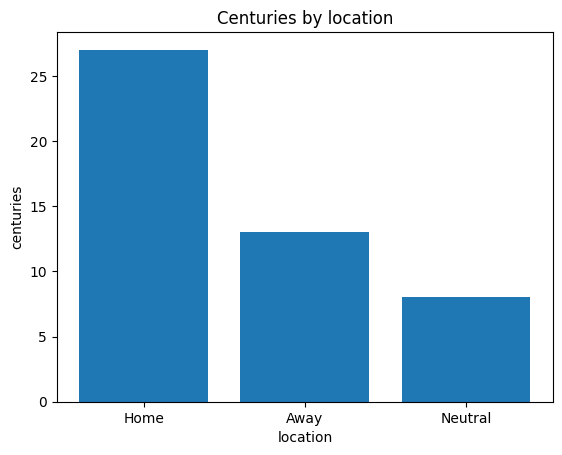

In [16]:
Centuries_by_location = rohit['H/A/N'].value_counts()
Centuries_by_location

fig, ax = plt.subplots()
ax.bar(Centuries_by_location.index, Centuries_by_location.values)
ax.set_xlabel('location')
ax.set_ylabel('centuries')
ax.set_title('Centuries by location')

Text(0.5, 1.0, 'Centuries by Match Type')

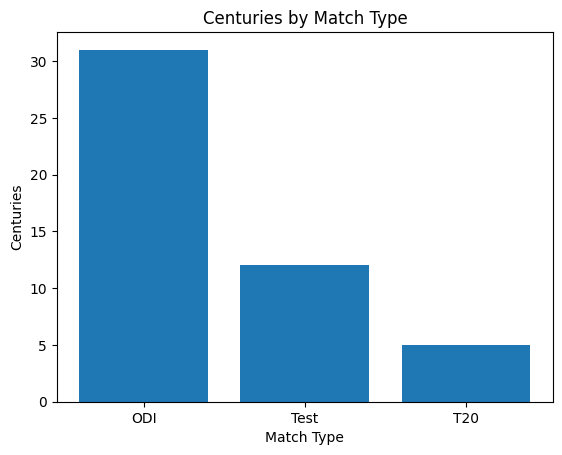

In [17]:
Centuries_by_match_type = rohit['Type of Match'].value_counts()
Centuries_by_match_type

fig, ax = plt.subplots()
ax.bar(Centuries_by_match_type.index, Centuries_by_match_type.values)
ax.set_xlabel('Match Type')
ax.set_ylabel('Centuries')
ax.set_title('Centuries by Match Type')

In [18]:
rohit['Balls Faced'] = (rohit['Score'] / rohit['Strike Rate']) * 100
rohit['Balls Faced'] = rohit['Balls Faced'].astype('int')
rohit.head()

,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result,Balls Faced
0,1,2010-05-28,114,95.79,ODI,4,1,Yes,No,No,Zimbabwe,"Queens Sports Club, Bulawayo",Away,Lost,119
1,2,2010-05-30,101,170.00,ODI,4,2,No,Yes,No,Sri Lanka,"Queens Sports Club, Bulawayo",Neutral,Won,59
2,3,2013-10-16,141,114.63,ODI,1,2,No,Yes,No,Australia,"Sawai Mansingh Stadium, Jaipur",Home,Won,123
3,4,2013-02-11,209,132.27,ODI,1,1,Yes,Yes,No,Australia,"M. Chinnaswamy Stadium, Bangalore",Home,Won,158
4,5,2014-11-13,264,152.60,ODI,2,1,Yes,Yes,No,Sri Lanka,"Eden Gardens, Kolkata",Home,Won,173


In [19]:
rohit['Result'] = rohit['Result'].str.replace('Won ', 'Won')
India_won_after_Rohit_Century = rohit['Result'].value_counts()
India_won_after_Rohit_Century

Result
Won     40
Lost     8
Name: count, dtype: int64

<BarContainer object of 48 artists>

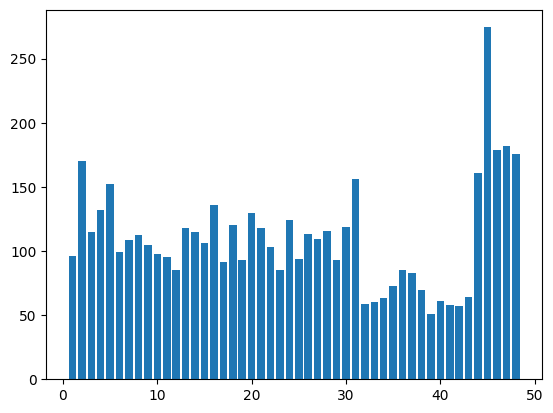

In [20]:
fig, ax = plt.subplots()
ax.bar(rohit['S.No.'], rohit['Strike Rate'])

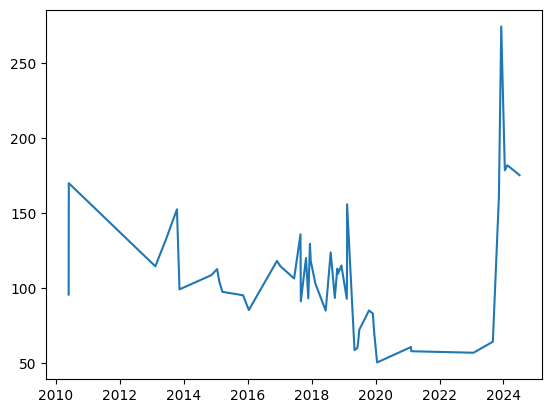

In [21]:
fig, ax = plt.subplots()
ax.plot(rohit['Date'].sort_values(), rohit['Strike Rate'])

In [22]:
rohit.set_index('Date').loc['2024']

,S.No.,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result,Balls Faced
Date,,,,,,,,,,,,,,
2024-02-15,42,131,57.05,Test,2,1,Yes,No,Yes,England,"Niranjan Shah Stadium, Rajkot",Home,Won,229
2024-07-03,43,103,64.37,Test,2,2,Yes,No,Yes,England,"HPCA Stadium, Dharamshala",Home,Won,160
2024-01-17,48,121,175.36,T20,2,1,No,Yes,Yes,Afghanistan,"M. Chinnaswamy Stadium, Bangalore",Home,Won,69


Date
2010     2
2013     4
2014     1
2015     4
2016     2
2017     8
2018     7
2019    10
2020     1
2021     2
2023     4
2024     3
Name: Type of Match, dtype: int64

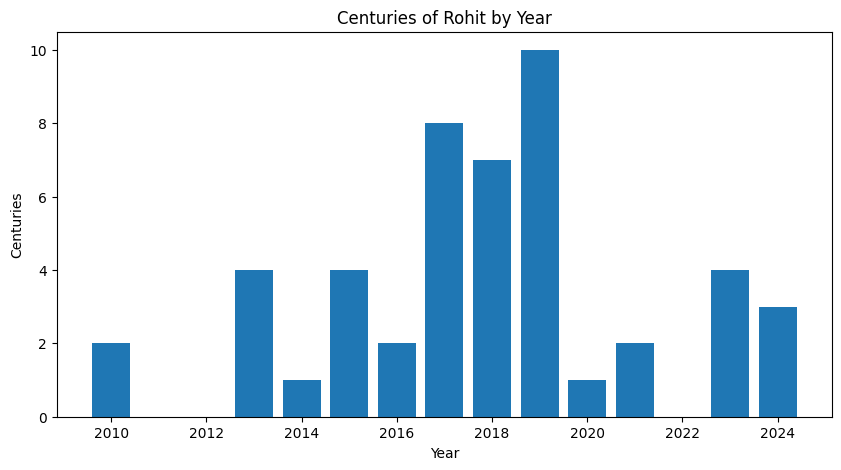

In [23]:
Rohit_centuries_by_year = rohit.groupby(rohit['Date'].dt.year)['Type of Match'].count()

fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(Rohit_centuries_by_year.index, Rohit_centuries_by_year.values)
ax.set_xlabel('Year')
ax.set_ylabel('Centuries')
ax.set_title('Centuries of Rohit by Year')
Rohit_centuries_by_year

In [24]:
Rohit_centuries_by_type_of_match_and_year = rohit.groupby([rohit['Date'].dt.year, 'Type of Match'])['Innings'].count()
Rohit_centuries_by_type_of_match_and_year = Rohit_centuries_by_type_of_match_and_year.reset_index()
Rohit_centuries_by_type_of_match_and_year
#fig, ax = plt.subplots()
#ax.bar(Rohit_centuries_by_type_of_match_and_year.index, Rohit_centuries_by_type_of_match_and_year.values)

,Date,Type of Match,Innings
0,2010,ODI,2
1,2013,ODI,2
2,2013,Test,2
3,2014,ODI,1
4,2015,ODI,3
5,2015,T20,1
6,2016,ODI,2
7,2017,ODI,6
8,2017,T20,1
9,2017,Test,1


In [25]:
Rohit_centuries_by_type_of_match_and_year_pivot_table = Rohit_centuries_by_type_of_match_and_year.pivot_table(
index = 'Date',
columns = 'Type of Match'
).droplevel(0, axis = 1)
Rohit_centuries_by_type_of_match_and_year_pivot_table

Type of Match,ODI,T20,Test
Date,,,
2010,2.0,NaN,NaN
2013,2.0,NaN,2.0
2014,1.0,NaN,NaN
2015,3.0,1.0,NaN
2016,2.0,NaN,NaN
2017,6.0,1.0,1.0
2018,5.0,2.0,NaN
2019,7.0,NaN,3.0
2020,1.0,NaN,NaN


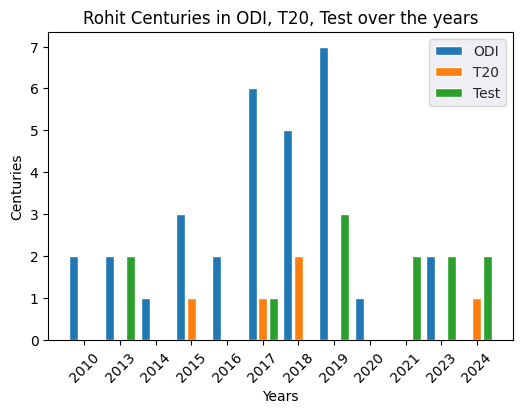

In [26]:
fig, ax = plt.subplots(figsize = (6, 4))
sns.set_style('darkgrid')

width = 0.25
total_years = Rohit_centuries_by_type_of_match_and_year_pivot_table.index
x = np.arange(len(total_years))


ax.bar(x - 0.3, Rohit_centuries_by_type_of_match_and_year_pivot_table['ODI'], width, label = 'ODI')
ax.bar(x, Rohit_centuries_by_type_of_match_and_year_pivot_table['T20'], width, label = 'T20')
ax.bar(x + 0.3, Rohit_centuries_by_type_of_match_and_year_pivot_table['Test'], width, label = 'Test')
ax.set_title("Rohit Centuries in ODI, T20, Test over the years")
ax.set_xlabel('Years')
ax.set_ylabel('Centuries')
ax.set_xticks(x, list(Rohit_centuries_by_type_of_match_and_year_pivot_table.index), rotation = 45)
ax.legend();

In [27]:
rohit.head()

,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result,Balls Faced
0,1,2010-05-28,114,95.79,ODI,4,1,Yes,No,No,Zimbabwe,"Queens Sports Club, Bulawayo",Away,Lost,119
1,2,2010-05-30,101,170.00,ODI,4,2,No,Yes,No,Sri Lanka,"Queens Sports Club, Bulawayo",Neutral,Won,59
2,3,2013-10-16,141,114.63,ODI,1,2,No,Yes,No,Australia,"Sawai Mansingh Stadium, Jaipur",Home,Won,123
3,4,2013-02-11,209,132.27,ODI,1,1,Yes,Yes,No,Australia,"M. Chinnaswamy Stadium, Bangalore",Home,Won,158
4,5,2014-11-13,264,152.60,ODI,2,1,Yes,Yes,No,Sri Lanka,"Eden Gardens, Kolkata",Home,Won,173


Against
Afghanistan     2
Australia       9
Bangladesh      3
England         7
New Zealand     2
Pakistan        2
South Africa    7
Sri Lanka       8
West Indies     7
Zimbabwe        1
Name: Score, dtype: int64

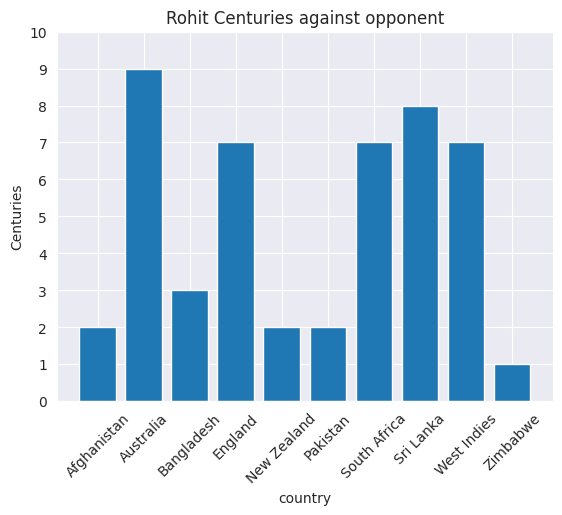

In [28]:
centuries_scored_against_countries = rohit.groupby('Against')['Score'].count()

fig, ax = plt.subplots()
ax.bar(centuries_scored_against_countries.index, centuries_scored_against_countries.values)
ax.set_xlabel('country')
ax.set_ylabel('Centuries')
ax.set_title('Rohit Centuries against opponent')
plt.xticks(rotation = 45)
plt.yticks(np.arange(11));

centuries_scored_against_countries

In [29]:
centuries_scored_against_countries_by_match_type = rohit.groupby(['Against', 'Type of Match'])['Innings'].count()
centuries_scored_against_countries_by_match_type = centuries_scored_against_countries_by_match_type.reset_index().pivot_table(
index = 'Against',
columns = 'Type of Match').droplevel(0, axis = 1)
centuries_scored_against_countries_by_match_type

Type of Match,ODI,T20,Test
Against,,,
Afghanistan,1.0,1.0,NaN
Australia,8.0,NaN,1.0
Bangladesh,3.0,NaN,NaN
England,2.0,1.0,4.0
New Zealand,2.0,NaN,NaN
Pakistan,2.0,NaN,NaN
South Africa,3.0,1.0,3.0
Sri Lanka,6.0,1.0,1.0
West Indies,3.0,1.0,3.0


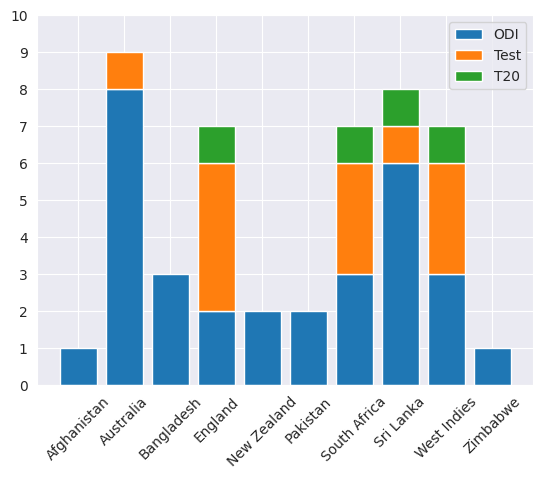

In [30]:
fig, ax = plt.subplots()
ax.bar(centuries_scored_against_countries_by_match_type.index, centuries_scored_against_countries_by_match_type['ODI'], label = 'ODI')
ax.bar(centuries_scored_against_countries_by_match_type.index, centuries_scored_against_countries_by_match_type['Test'], bottom = centuries_scored_against_countries_by_match_type['ODI'], label = 'Test')
ax.bar(centuries_scored_against_countries_by_match_type.index, centuries_scored_against_countries_by_match_type['T20'], bottom = centuries_scored_against_countries_by_match_type['ODI'] + centuries_scored_against_countries_by_match_type['Test'], label = 'T20')
ax.legend()
plt.xticks(rotation = 45)
plt.yticks(np.arange(11));

In [31]:
rohit_centuries_against_teams_by_years = rohit.groupby([rohit['Date'].dt.year, 'Against', 'Type of Match'])['Score'].count()
rohit_centuries_against_teams_by_years.reset_index().pivot_table(index = 'Date', columns = 'Against', values = 'Score', aggfunc = 'sum')

Against,Afghanistan,Australia,Bangladesh,England,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwe
Date,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
2013,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2015,NaN,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2016,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,1.0,1.0,NaN,1.0,NaN,NaN,5.0,NaN,NaN
2018,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,3.0,NaN
2019,NaN,1.0,1.0,1.0,NaN,1.0,4.0,1.0,1.0,NaN
2020,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
rohit_centuries_against_teams_by_years

Date  Against       Type of Match
2010  Sri Lanka     ODI              1
      Zimbabwe      ODI              1
2013  Australia     ODI              2
      West Indies   Test             2
2014  Sri Lanka     ODI              1
2015  Australia     ODI              1
      Bangladesh    ODI              1
      South Africa  ODI              1
                    T20              1
2016  Australia     ODI              2
2017  Australia     ODI              1
      Bangladesh    ODI              1
      New Zealand   ODI              1
      Sri Lanka     ODI              3
                    T20              1
                    Test             1
2018  England       ODI              1
                    T20              1
      Pakistan      ODI              1
      South Africa  ODI              1
      West Indies   ODI              2
                    T20              1
2019  Australia     ODI              1
      Bangladesh    ODI              1
      England       ODI       